In [106]:
# Beginning notebook
# Import dependancies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd

In [107]:
raw_df = pd.read_csv("./edited_dataset.csv") # Call in csv data
raw_df['final_total'] = raw_df['score_home'] + raw_df['score_away'] # Create new columns
raw_df['True Spread']=0 # Create new columns
raw_df['Spread Outcome'] = 0 # Create new columns
raw_df['Total Outcome'] = 0 # Create new columns

# Rename all columns
raw_df = raw_df.rename(columns = {'schedule_date':'Date', 'schedule_season':'Season', 'schedule_week':'Week',
                                  'schedule_playoff':'Playoff Game', 'team_home':'Home Team','score_home':'Home Final',
                                  'score_away':'Away Final','team_away':'Away Team', 'team_favorite_id':'Favorite',
                                  'spread_favorite':'Spread', 'over_under_line':'Over/Under', 'stadium':'Location',
                                  'stadium_neutral':'Neutral Site','weather_temperature':'Temperature','weather_wind_mph':'Wind(MPH)',
                                  'weather_humidity':'Humidity', 'weather_detail':'Location Detail','final_total':'Total'
                                  
                                 })
# Reorder all columns
raw_df = raw_df[['Date', 'Season','Week','Playoff Game','Home Team','Home Final','True Spread','Away Final','Away Team',
                'Favorite','Spread','Over/Under','Total','Spread Outcome','Total Outcome','Location','Neutral Site','Temperature','Wind(MPH)','Humidity',
                'Location Detail']]

In [108]:
# Convert all home team column values to acronym to match favorite column
home_replaced = raw_df.replace({'Home Team' : {'New Orleans Saints':'NO', 'Miami Dolphins':'MIA','Chicago Bears':'CHI',
                                        'Buffalo Bills':'BUF','Houston Texans':'HOU', 'Jacksonville Jaguars':'JAX', 
                                        'New England Patriots':'NE','New York Giants':'NYG','Philadelphia Eagles':'PHI',
                                       'Pittsburgh Steelers':'PIT', 'Seattle Seahawks':'SEA','St. Louis Rams':'LAR',
                                       'Tampa Bay Buccaneers':'TB','Tennessee Titans':'TEN','Washington Redskins':'WAS',
                                       'Kansas City Chiefs':'KC','New York Jets':'NYJ','Atlanta Falcons':'ATL',
                                       'Carolina Panthers':'CAR','Cincinnati Bengals':'CIN','Cleveland Browns':'CLE',
                                       'Dallas Cowboys':'DAL','Denver Broncos':'DEN','Detroit Lions':'DET','Green Bay Packers':
                                       'GB','Indianapolis Colts':'IND','Minnesota Vikings':'MIN','Oakland Raiders':'OAK',
                                       'San Diego Chargers':'LAC','San Francisco 49ers':'SF','Arizona Cardinals':'ARI',
                                       'Baltimore Ravens':'BAL','Miami Dolphins':'MIA','Los Angeles Rams':'LAR',
                                       'Los Angeles Chargers':'LAC'}})

new_df = home_replaced.replace({'Away Team' : {'New Orleans Saints':'NO', 'Miami Dolphins':'MIA','Chicago Bears':'CHI',
                                        'Buffalo Bills':'BUF','Houston Texans':'HOU', 'Jacksonville Jaguars':'JAX', 
                                        'New England Patriots':'NE','New York Giants':'NYG','Philadelphia Eagles':'PHI',
                                       'Pittsburgh Steelers':'PIT', 'Seattle Seahawks':'SEA','St. Louis Rams':'LAR',
                                       'Tampa Bay Buccaneers':'TB','Tennessee Titans':'TEN','Washington Redskins':'WAS',
                                       'Kansas City Chiefs':'KC','New York Jets':'NYJ','Atlanta Falcons':'ATL',
                                       'Carolina Panthers':'CAR','Cincinnati Bengals':'CIN','Cleveland Browns':'CLE',
                                       'Dallas Cowboys':'DAL','Denver Broncos':'DEN','Detroit Lions':'DET','Green Bay Packers':
                                       'GB','Indianapolis Colts':'IND','Minnesota Vikings':'MIN','Oakland Raiders':'OAK',
                                       'San Diego Chargers':'LAC','San Francisco 49ers':'SF','Arizona Cardinals':'ARI',
                                       'Baltimore Ravens':'BAL','Miami Dolphins':'MIA','Los Angeles Rams':'LAR',
                                       'Los Angeles Chargers':'LAC'}})


In [109]:
# Solving for if the favorite covered
def func(row):
    if row['Favorite'] == row['Home Team']:
        return row['Home Final'] + row['Spread'] - row['Away Final']
    else:
        return row['Away Final'] + row['Spread'] - row['Home Final']
        
new_df['True Spread'] = new_df.apply(func, axis=1)

In [110]:
def spread(row):
    if row['True Spread'] > 0:
        return "FAV"
    elif row['True Spread'] < 0:
        return "DOG"
    else:
        return "PUSH"

new_df['Spread Outcome'] = new_df.apply(spread, axis=1)

In [111]:
def total(row):
    if row['Total'] < row['Over/Under']:
        return "UNDER"
    elif row['Total'] > row['Over/Under']:
        return "Over"
    else:
        return "PUSH"

new_df['Total Outcome'] = new_df.apply(total, axis=1)
final_df = pd.DataFrame(new_df)

In [112]:
final_df.head()

,Date,Season,Week,Playoff Game,Home Team,Home Final,True Spread,Away Final,Away Team,Favorite,...,Over/Under,Total,Spread Outcome,Total Outcome,Location,Neutral Site,Temperature,Wind(MPH),Humidity,Location Detail
0,9/9/2010,2010,1,False,NO,14,0.0,9,MIN,NO,...,49.5,23,PUSH,UNDER,Louisiana Superdome,False,72.0,0.0,NaN,DOME
1,9/12/2010,2010,1,False,BUF,10,2.0,15,MIA,MIA,...,39.0,25,FAV,UNDER,Ralph Wilson Stadium,False,64.0,7.0,81.0,NaN
2,9/12/2010,2010,1,False,CHI,19,-1.5,14,DET,CHI,...,45.0,33,DOG,UNDER,Soldier Field,False,75.0,1.0,45.0,NaN
3,9/12/2010,2010,1,False,HOU,34,-11.0,24,IND,IND,...,48.0,58,DOG,Over,Reliant Stadium,False,89.0,5.0,NaN,DOME (Open Roof)
4,9/12/2010,2010,1,False,JAX,24,4.0,17,DEN,JAX,...,41.5,41,FAV,UNDER,EverBank Field,False,91.0,1.0,67.0,NaN


In [113]:
def homeaway(row):
   if row['Home Final'] > row['Away Final']:
       return "Home Win"
   else:
       return "Away Win"
new_df['Home Away Winner'] = new_df.apply(homeaway, axis=1)
def homecover(row):
   if row['Home Team'] == row['Favorite'] and row['Spread Outcome'] == "FAV":
       return "Home Favorite Cover"
   elif row['Away Team'] == row['Favorite'] and row['Spread Outcome'] == "DOG":
           return "Home Dog Cover"
   elif row['Away Team'] == row['Favorite'] and row['Spread Outcome'] == "FAV":
           return "Away Favorite Cover"
   elif row['Home Team'] == row['Favorite'] and row['Spread Outcome'] == "DOG":
           return "Away Dog Cover"
   else:
    return "PUSH"
new_df['Location Cover'] = new_df.apply(homecover, axis=1)
new_df.columns
#print(new_df)

stadium = new_df.groupby(["Location"])
stadiumdf = stadium["Date", "Location", "Home Team", "Away Team","Favorite","Spread", "Home Final", "Away Final", "Location Cover", "Over/Under", "Total Outcome"]
stadiumdf.head()

,Date,Location,Home Team,Away Team,Favorite,Spread,Home Final,Away Final,Location Cover,Over/Under,Total Outcome
0,9/9/2010,Louisiana Superdome,NO,MIN,NO,-5.0,14,9,PUSH,49.5,UNDER
1,9/12/2010,Ralph Wilson Stadium,BUF,MIA,MIA,-3.0,10,15,Away Favorite Cover,39.0,UNDER
2,9/12/2010,Soldier Field,CHI,DET,CHI,-6.5,19,14,Away Dog Cover,45.0,UNDER
3,9/12/2010,Reliant Stadium,HOU,IND,IND,-1.0,34,24,Home Dog Cover,48.0,Over
4,9/12/2010,EverBank Field,JAX,DEN,JAX,-3.0,24,17,Home Favorite Cover,41.5,UNDER
5,9/12/2010,Gillette Stadium,NE,CIN,NE,-5.5,38,24,Home Favorite Cover,45.0,Over
6,9/12/2010,MetLife Stadium,NYG,CAR,NYG,-6.0,31,18,Home Favorite Cover,41.0,Over
7,9/12/2010,Lincoln Financial Field,PHI,GB,GB,-3.0,20,27,Away Favorite Cover,48.0,UNDER
8,9/12/2010,Heinz Field,PIT,ATL,ATL,-1.5,15,9,Home Dog Cover,39.5,UNDER
9,9/12/2010,CenturyLink Field,SEA,SF,SF,-3.0,31,6,Home Dog Cover,37.0,PUSH


In [114]:
home_teams = new_df["Home Team"].unique()

In [115]:
def homeaway(row):
   if row['Home Final'] > row['Away Final']:
       return "Home Win"
   else:
       return "Away Win"
new_df['Home Away Winner'] = new_df.apply(homeaway, axis=1)
def homecover(row):
   if row['Home Team'] == row['Favorite'] and row['Spread Outcome'] == "FAV":
       return "Home Favorite Cover"
   elif row['Away Team'] == row['Favorite'] and row['Spread Outcome'] == "DOG":
           return "Home Dog Cover"
   elif row['Away Team'] == row['Favorite'] and row['Spread Outcome'] == "FAV":
           return "Away Favorite Cover"
   elif row['Home Team'] == row['Favorite'] and row['Spread Outcome'] == "DOG":
           return "Away Dog Cover"
   else:
    return "PUSH"
new_df['Location Cover'] = new_df.apply(homecover, axis=1)
new_df.columns
#print(new_df)
stadium = new_df.groupby(["Location Cover", "Home Team"]).count()['Date']
stadium_df = pd.DataFrame(stadium)
stadium_df.reset_index().head()

stadium_df

stadium_df.unstack(0)

Date                                     \
Location Cover Away Dog Cover Away Favorite Cover Home Dog Cover   
Home Team                                                          
ARI                      24.0                13.0           18.0   
ATL                      35.0                 3.0           10.0   
BAL                      36.0                 4.0            4.0   
BUF                      19.0                14.0           17.0   
CAR                      21.0                13.0           13.0   
CHI                      22.0                16.0           15.0   
CIN                      25.0                 8.0           13.0   
CLE                      17.0                25.0           21.0   
DAL                      36.0                 8.0           12.0   
DEN                      33.0                11.0           13.0   
DET                      21.0                14.0           14.0   
GB                       25.0                 5.0            3.0   
HOU                      25.0                13.0            7.0   
IND                      22.0                10.0           15.0   
JAX                      13.0                28.0           16.0   
KC                       34.0                 6.0           13.0   
LAC                      29.0                12.0            6.0   
LAR                      20.0                19.0           17.0   
MIA                      21.0                13.0           17.0   
MIN                      20.0                 7.0           17.0   
NE                       31.0                 NaN            3.0   
NO                       31.0                 2.0            6.0   
NYG                      26.0                14.0            9.0   
NYJ                      22.0                12.0           18.0   
OAK                      18.0                23.0           16.0   
PHI                      31.0                10.0            4.0   
PIT                      29.0                 3.0            7.0   
SEA                      23.0                 5.0           15.0   
SF                       24.0                13.0           14.0   
TB                       21.0                20.0           15.0   
TEN                      20.0                17.0           12.0   
WAS                      18.0                20.0           23.0   

                                         
Location Cover Home Favorite Cover PUSH  
Home Team                                
ARI                           16.0  2.0  
ATL                           27.0  2.0  
BAL                           27.0  4.0  
BUF                           18.0  4.0  
CAR                           28.0  1.0  
CHI                           18.0  4.0  
CIN                           24.0  4.0  
CLE                            7.0  2.0  
DAL                           17.0  2.0  
DEN                           23.0  1.0  
DET                           23.0  NaN  
GB                            42.0  3.0  
HOU                           30.0  2.0  
IND                           25.0  3.0  
JAX                           12.0  4.0  
KC                            24.0  NaN  
LAC                           23.0  2.0  
LAR                           16.0  3.0  
MIA                           15.0  6.0  
MIN                           27.0  3.0  
NE                            52.0  4.0  
NO                            35.0  2.0  
NYG                           21.0  3.0  
NYJ                           18.0  2.0  
OAK                           13.0  2.0  
PHI                           30.0  1.0  
PIT                           34.0  4.0  
SEA                           33.0  2.0  
SF                            22.0  3.0  
TB                            13.0  3.0  
TEN                           16.0  7.0  
WAS                           10.0  3.0

In [116]:
new_df.groupby(["Location Cover", "Home Team"]).count()['Date']
home_team =stadium_df.unstack(0)
home_team.reset_index(inplace=True)
#This removed the 1st level columns
home_team.columns = home_team.columns.get_level_values(1)
home_team.fillna(0, inplace=True)
home_team["total"] =home_team["Away Dog Cover"] +home_team["Away Favorite Cover"] + home_team["Home Dog Cover"] + home_team["Home Favorite Cover"] + home_team["PUSH"]
home_team

Location Cover,,Away Dog Cover,Away Favorite Cover,Home Dog Cover,Home Favorite Cover,PUSH,total
0,ARI,24.0,13.0,18.0,16.0,2.0,73.0
1,ATL,35.0,3.0,10.0,27.0,2.0,77.0
2,BAL,36.0,4.0,4.0,27.0,4.0,75.0
3,BUF,19.0,14.0,17.0,18.0,4.0,72.0
4,CAR,21.0,13.0,13.0,28.0,1.0,76.0
5,CHI,22.0,16.0,15.0,18.0,4.0,75.0
6,CIN,25.0,8.0,13.0,24.0,4.0,74.0
7,CLE,17.0,25.0,21.0,7.0,2.0,72.0
8,DAL,36.0,8.0,12.0,17.0,2.0,75.0
9,DEN,33.0,11.0,13.0,23.0,1.0,81.0


In [117]:
home_dog_perc = home_team["Home Dog Cover"] / (home_team["Away Favorite Cover"] + home_team["Home Dog Cover"]) * 100
home_fav_perc = home_team["Home Favorite Cover"] / (home_team["Away Dog Cover"] + home_team["Home Favorite Cover"]) * 100

In [118]:
cover_percents = pd.DataFrame({"Home Team": home_team[""],
                               "Home Dog %": home_dog_perc,
                               "Home Favorite %": home_fav_perc,
                               "Away Dog %": 100 - home_fav_perc,
                               "Away Favorite %": 100 - home_dog_perc})
cover_percents

,Home Team,Home Dog %,Home Favorite %,Away Dog %,Away Favorite %
0,ARI,58.064516,40.000000,60.000000,41.935484
1,ATL,76.923077,43.548387,56.451613,23.076923
2,BAL,50.000000,42.857143,57.142857,50.000000
3,BUF,54.838710,48.648649,51.351351,45.161290
4,CAR,50.000000,57.142857,42.857143,50.000000
5,CHI,48.387097,45.000000,55.000000,51.612903
6,CIN,61.904762,48.979592,51.020408,38.095238
7,CLE,45.652174,29.166667,70.833333,54.347826
8,DAL,60.000000,32.075472,67.924528,40.000000
9,DEN,54.166667,41.071429,58.928571,45.833333


In [119]:
cover_percents2 = pd.DataFrame.round(cover_percents.copy(), 2)
cover_perc_columns = list(cover_percents2.columns)
for i in range(1, len(cover_perc_columns)):
    cover_percents2[cover_perc_columns[i]] = cover_percents2[cover_perc_columns[i]].astype(str) + '%'
cover_percents2

,Home Team,Home Dog %,Home Favorite %,Away Dog %,Away Favorite %
0,ARI,58.06%,40.0%,60.0%,41.94%
1,ATL,76.92%,43.55%,56.45%,23.08%
2,BAL,50.0%,42.86%,57.14%,50.0%
3,BUF,54.84%,48.65%,51.35%,45.16%
4,CAR,50.0%,57.14%,42.86%,50.0%
5,CHI,48.39%,45.0%,55.0%,51.61%
6,CIN,61.9%,48.98%,51.02%,38.1%
7,CLE,45.65%,29.17%,70.83%,54.35%
8,DAL,60.0%,32.08%,67.92%,40.0%
9,DEN,54.17%,41.07%,58.93%,45.83%


In [120]:
a = cover_percents.iloc[0, 1:4]
b= cover_percents.iloc[31, 1:4]
c = cover_percents.iloc[20, 1:4]
index = ['Arizona','Washington','New England']
df = pd.DataFrame({'Arizona': a,
                  'Washington': b,
                  'New England': c}, index=index)

Text(0, 0.5, 'Cover Percentage')

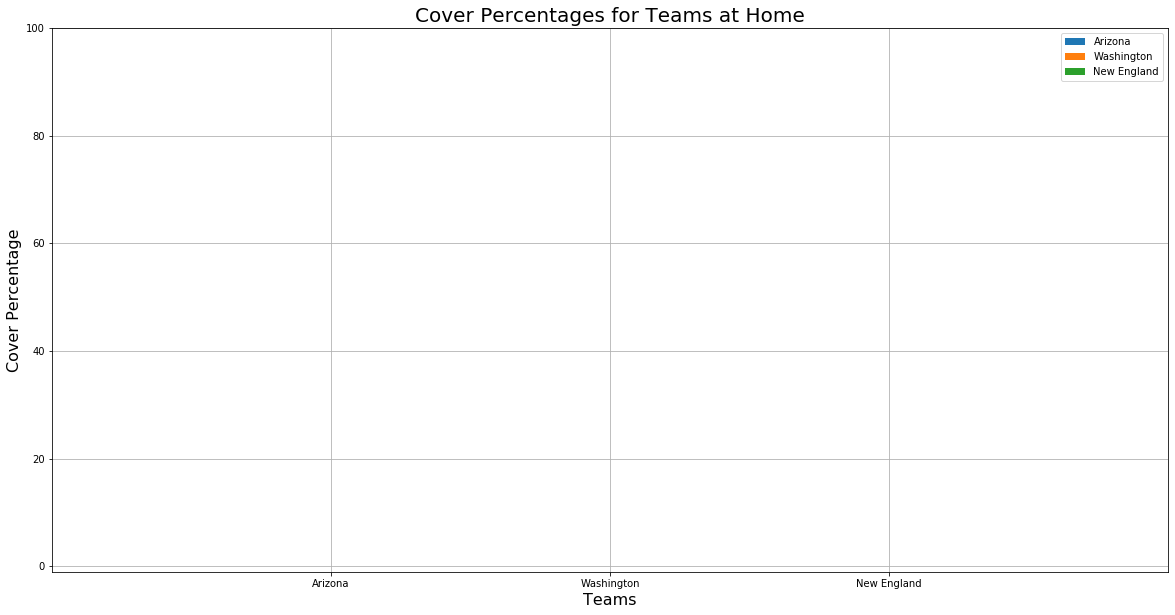

In [121]:
ax = df.plot.bar(figsize=(20, 10), rot=0)
plt.xlim(-1, 3)
plt.ylim(-1, 100)
plt.bar(a, b, c, data=df, color=["g", "g", "g", "g"])
plt.grid(True)
plt.title("Cover Percentages for Teams at Home", fontsize=20)
plt.xlabel("Teams", fontsize=16)
plt.ylabel("Cover Percentage", fontsize=16)


In [122]:
#x_axis_home = np.arange(len(home_teams))
#plt.bar(x_axis_home, cover_percents["Home Team"], color="b", align="center")
plt.bar(cover_percents)

TypeError: bar() missing 1 required positional argument: 'height'

TypeError: bar() takes from 2 to 4 positional arguments but 5 positional arguments (and 1 keyword-only argument) were given

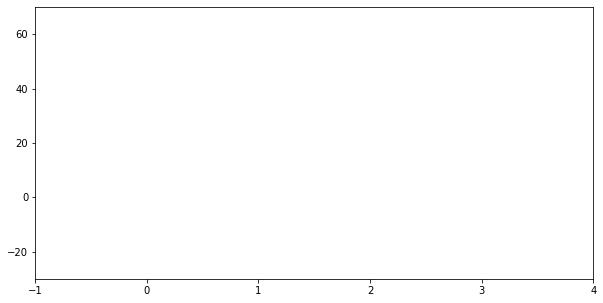

In [84]:
plt.figure(figsize=(10, 5))
plt.xlim(-1, 4)
plt.ylim(-30, 70)
plt.bar("Home Team", "Home Dog %", "Home Favorite %", "Away Dog %", "Away Favorite %", data=cover_percents, color=["g"])
plt.grid(True)
plt.title("Cover Percentages for Teams at Home", fontsize=16)
plt.xlabel("Teams", fontsize=12)
plt.ylabel("Cover Percentage", fontsize=12)

plt.text(count, y_value, str(round(x, 2)) + '%', ha = 'center', color = 'white', fontsize = 12)

    
plt.show()

In [ ]:
speed = [0.1, 17.5, 40, 48, 52, 69, 88]
>>> lifespan = [2, 8, 70, 1.5, 25, 12, 28]
>>> index = ['snail', 'pig', 'elephant',
...          'rabbit', 'giraffe', 'coyote', 'horse']
>>> df = pd.DataFrame({'speed': speed,
...                    'lifespan': lifespan}, index=index)
>>> ax = df.plot.bar(rot=0)

In [53]:
def homeaway(row):
   if row['Home Final'] > row['Away Final']:
       return "Home Win"
   else:
       return "Away Win"
new_df['Home Away Winner'] = new_df.apply(homeaway, axis=1)
def homecover(row):
   if row['Home Team'] == row['Favorite'] and row['Spread Outcome'] == "FAV":
       return "Home Favorite Cover"
   elif row['Away Team'] == row['Favorite'] and row['Spread Outcome'] == "DOG":
           return "Home Dog Cover"
   elif row['Away Team'] == row['Favorite'] and row['Spread Outcome'] == "FAV":
           return "Away Favorite Cover"
   elif row['Home Team'] == row['Favorite'] and row['Spread Outcome'] == "DOG":
           return "Away Dog Cover"
   else:
    return "PUSH"
new_df['Location Cover'] = new_df.apply(homecover, axis=1)
new_df.columns
#print(new_df)
stadium_away = new_df.groupby(["Location Cover", "Away Team"]).count()['Date']
stadium_away_df = pd.DataFrame(stadium_away)
stadium_away_df.reset_index().head()

stadium_away_df

stadium_away_df.unstack(0)

Date                                     \
Location Cover Away Dog Cover Away Favorite Cover Home Dog Cover   
Away Team                                                          
ARI                      24.0                11.0            9.0   
ATL                      18.0                17.0           18.0   
BAL                      27.0                14.0           16.0   
BUF                      27.0                 4.0            7.0   
CAR                      25.0                10.0           17.0   
CHI                      28.0                 9.0            8.0   
CIN                      27.0                13.0            9.0   
CLE                      28.0                 3.0            2.0   
DAL                      25.0                15.0           13.0   
DEN                      14.0                21.0           17.0   
DET                      24.0                 9.0           15.0   
GB                       16.0                23.0           21.0   
HOU                      21.0                11.0           10.0   
IND                      26.0                12.0           10.0   
JAX                      31.0                 4.0            5.0   
KC                       25.0                18.0            9.0   
LAC                      33.0                11.0           15.0   
LAR                      24.0                10.0            9.0   
MIA                      28.0                 6.0            7.0   
MIN                      27.0                10.0           10.0   
NE                       11.0                31.0           29.0   
NO                       23.0                17.0           22.0   
NYG                      30.0                10.0            9.0   
NYJ                      19.0                10.0            9.0   
OAK                      35.0                 3.0            5.0   
PHI                      24.0                15.0           19.0   
PIT                      19.0                18.0           26.0   
SEA                      21.0                17.0           20.0   
SF                       20.0                15.0           12.0   
TB                       36.0                 2.0            5.0   
TEN                      24.0                 6.0           13.0   
WAS                      32.0                 6.0            7.0   

                                         
Location Cover Home Favorite Cover PUSH  
Away Team                                
ARI                           28.0  2.0  
ATL                           21.0  2.0  
BAL                           17.0  6.0  
BUF                           32.0  3.0  
CAR                           20.0  3.0  
CHI                           26.0  1.0  
CIN                           20.0  6.0  
CLE                           34.0  5.0  
DAL                           18.0  3.0  
DEN                           19.0  2.0  
DET                           24.0  3.0  
GB                            18.0  3.0  
HOU                           28.0  5.0  
IND                           26.0  4.0  
JAX                           30.0  4.0  
KC                            21.0  2.0  
LAC                           15.0  2.0  
LAR                           28.0  2.0  
MIA                           32.0  NaN  
MIN                           24.0  3.0  
NE                             4.0  1.0  
NO                            15.0  NaN  
NYG                           23.0  4.0  
NYJ                           30.0  7.0  
OAK                           29.0  1.0  
PHI                           17.0  NaN  
PIT                           13.0  2.0  
SEA                           18.0  5.0  
SF                            26.0  3.0  
TB                            27.0  2.0  
TEN                           29.0  2.0  
WAS                           27.0  NaN

In [54]:
away_team =stadium_away_df.unstack(0)

away_team.head(1)

away_team.reset_index(inplace=True)

#This removed the 1st level columns
away_team.columns = away_team.columns.get_level_values(1)

away_team.fillna(0, inplace=True)

away_team["Total"] =away_team["Away Dog Cover"] +away_team["Away Favorite Cover"] + away_team["Home Dog Cover"] + away_team["Home Favorite Cover"] + away_team["PUSH"]

away_team

Location Cover,,Away Dog Cover,Away Favorite Cover,Home Dog Cover,Home Favorite Cover,PUSH,Total
0,ARI,24.0,11.0,9.0,28.0,2.0,74.0
1,ATL,18.0,17.0,18.0,21.0,2.0,76.0
2,BAL,27.0,14.0,16.0,17.0,6.0,80.0
3,BUF,27.0,4.0,7.0,32.0,3.0,73.0
4,CAR,25.0,10.0,17.0,20.0,3.0,75.0
5,CHI,28.0,9.0,8.0,26.0,1.0,72.0
6,CIN,27.0,13.0,9.0,20.0,6.0,75.0
7,CLE,28.0,3.0,2.0,34.0,5.0,72.0
8,DAL,25.0,15.0,13.0,18.0,3.0,74.0
9,DEN,14.0,21.0,17.0,19.0,2.0,73.0


In [55]:
away_dog_perc =away_team["Home Dog Cover"] / (away_team["Away Favorite Cover"] + away_team["Home Dog Cover"]) * 100
away_fav_perc = away_team["Home Favorite Cover"] / (away_team["Away Dog Cover"] + away_team["Home Favorite Cover"]) * 100

In [56]:
cover_percents_away = pd.DataFrame({"Away Team": away_team[""],
                               "Away Dog %": away_dog_perc,
                               "Away Favorite %": away_fav_perc,
                               "Home Dog %": 100 - away_fav_perc,
                               "Home Favorite %": 100 - away_dog_perc})
cover_percents_away

,Away Team,Away Dog %,Away Favorite %,Home Dog %,Home Favorite %
0,ARI,45.000000,53.846154,46.153846,55.000000
1,ATL,51.428571,53.846154,46.153846,48.571429
2,BAL,53.333333,38.636364,61.363636,46.666667
3,BUF,63.636364,54.237288,45.762712,36.363636
4,CAR,62.962963,44.444444,55.555556,37.037037
5,CHI,47.058824,48.148148,51.851852,52.941176
6,CIN,40.909091,42.553191,57.446809,59.090909
7,CLE,40.000000,54.838710,45.161290,60.000000
8,DAL,46.428571,41.860465,58.139535,53.571429
9,DEN,44.736842,57.575758,42.424242,55.263158


In [57]:
cover_percents2_away = pd.DataFrame.round(cover_percents_away.copy(), 2)
cover_perc_columns_away = list(cover_percents2_away.columns)
for i in range(1, len(cover_perc_columns_away)):
    cover_percents2_away[cover_perc_columns_away[i]] = cover_percents2_away[cover_perc_columns_away[i]].astype(str) + '%'
cover_percents2_away

,Away Team,Away Dog %,Away Favorite %,Home Dog %,Home Favorite %
0,ARI,45.0%,53.85%,46.15%,55.0%
1,ATL,51.43%,53.85%,46.15%,48.57%
2,BAL,53.33%,38.64%,61.36%,46.67%
3,BUF,63.64%,54.24%,45.76%,36.36%
4,CAR,62.96%,44.44%,55.56%,37.04%
5,CHI,47.06%,48.15%,51.85%,52.94%
6,CIN,40.91%,42.55%,57.45%,59.09%
7,CLE,40.0%,54.84%,45.16%,60.0%
8,DAL,46.43%,41.86%,58.14%,53.57%
9,DEN,44.74%,57.58%,42.42%,55.26%


In [ ]:
a = cover_percents['Home Dog %']
b= cover_percents['Home Favorite %']
c = cover_percents['Away Dog %']
d = cover_percents['Away Favorite %']
index = ['chicago','minnesota','new england','cleveland']
df = pd.DataFrame({'HomeDog%': a,
                  'Home Favorite%': b,
                  'Away Dog %': c,
                  'Away Favorite %':d}, index=index)

In [ ]:
ax = df.plot.bar(figsize=(20, 10), rot=0)
plt.xlim(-1, 4)
plt.ylim(-1, 100)
plt.grid(True)
plt.title("Cover Percentages for Teams at Home", fontsize=16)
plt.xlabel("Teams", fontsize=12)
plt.ylabel("Cover Percentage", fontsize=12)